In [1]:
!pip install pandas
!pip install numpy
!pip install mamba



  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 8.2 MB/s eta 0:00:00
  Created wheel for mamba: filename=mamba-0.11.3-py3-none-any.whl size=16290 sha256=7eea86862a5cae2f3495eb1291f267fe4b7b1ca3e36e0df6675254a6f7a6d2bf
  Stored in directory: /root/.cache/pip/wheels/50/17/87/0c6977b03e2d11fa43ca902080bb7e1d76334f33cfaca2cc34
  Created wheel for clint: filename=clint-0.5.1-py3-none-any.whl size=34459 sha256=d877706a7a10f5f859db1808755dcad2e9f40de7d1c3ea923988a93642a289fd
  Stored in directory: /root/.cache/pip/wheels/a0/8d/f3/91dd49f9a8c6a57be7715f6d11347c49971dd292a53397ed79
  Created wheel for args: filename=args-0.1.0-py3-none-any.whl size=3319 sha256=0e4fbb547dd5bb864cd27c6f9170dd7b2ba9d2475a87d47d58c2e1920401e359
  Stored in directory: /root/.cache/pip/wheels/15/a2/87/2541eb895fd18fd20cc7dd18b14d3b61bd9084cf4322abd15e
Successfully built mamba clint arg

In [4]:
!mamba install 'pytorch=*=*cuda*'
!mamba install  'ray-tune>=2.10.0,<2.32' 'ray-default>=2.10.0,<2.32'



0 examples ran in 0.0000 seconds


0 examples ran in 0.0000 seconds


In [24]:
!nvidia-smi

Sat Mar  1 01:22:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P0             27W /   70W |     516MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import logging
import os
from typing import Dict, List, Optional, Union, Tuple
import warnings
warnings.filterwarnings('ignore')

# Set up logging
log_dir = './logs'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
logging.basicConfig(
    filename=os.path.join(log_dir, 'darts_training_alpine_valley.log'),
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
)

# GPU setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

if torch.cuda.is_available():
    torch.backends.cudnn.benchmark = True
    from torch.cuda.amp import GradScaler
    scaler = GradScaler(enabled=True)
    print(f"CUDA available: {torch.cuda.get_device_name(0)}")
    print(f"Memory available: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")


Using device: cuda
CUDA available: Tesla T4
Memory available: 15.83 GB


In [7]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 972.2/972.2 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:0

In [40]:
# Import Darts components
from darts.models import NBEATSModel, BlockRNNModel, TCNModel, TFTModel
from darts.metrics import mape, mae, mase
from darts import TimeSeries
from darts.utils.likelihood_models import GaussianLikelihood
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries


In [56]:
# Configuration dictionary - adjust as needed
CONFIG = {
    "data_path": "/content/maurienne_valley_20_years_daily_data.csv",  # Update with your path
    "date_column": "Date",
    "target_columns": ["Mean Temperature (°C)", "Min Temperature (°C)", "Max Temperature (°C)"],
    "target_year": 2050,
    "valley_ids": ["maurienne"],  # Add "susa" when using data from both valleys
    "frequency": "D",  # "D" for daily, "M" for monthly
    "model_type": "TFTModel",  # Options: "NBEATSModel", "BlockRNNModel", "TCNModel", "TFTModel"
    "input_chunk_length": 365,  # Lookback window (1 year of daily data)
    "output_chunk_length": 30,  # Output window (1 month of daily data)
    "n_epochs": 1,
    "use_covariates": True,
    "validation_length": 365 * 2,  # 2 years of daily data
    "random_state": 42,
}

# Display configuration for review
for key, value in CONFIG.items():
    print(f"{key}: {value}")


data_path: /content/maurienne_valley_20_years_daily_data.csv
date_column: Date
target_columns: ['Mean Temperature (°C)', 'Min Temperature (°C)', 'Max Temperature (°C)']
target_year: 2050
valley_ids: ['maurienne']
frequency: D
model_type: TFTModel
input_chunk_length: 365
output_chunk_length: 30
n_epochs: 1
use_covariates: True
validation_length: 730
random_state: 42


In [57]:
class WeatherForecaster:
    def __init__(self, config: Dict) -> None:
        """
        Initialize the WeatherForecaster with the given configuration.

        Args:
            config (Dict): Configuration dictionary containing parameters for data loading,
                           model training, and forecasting.
        """
        self.config = config
        self.model = None
        self.scalers = {}
        self.full_history = None
        self.covariates = None

    def _load_data(self) -> Dict[str, TimeSeries]:
        """
        Load and preprocess time series data.

        Returns:
            Dict[str, TimeSeries]: Dictionary mapping valley IDs to TimeSeries objects.
        """
        df = pd.read_csv(self.config["data_path"])
        df["timestamp"] = pd.to_datetime(df[self.config["date_column"]])

        series_dict = {}
        for valley_id in self.config["valley_ids"]:
            # Filter data for this valley if needed
            valley_df = df[df["item_id"] == valley_id] if "item_id" in df.columns else df

            # Select target columns
            target_cols = self.config["target_columns"]
            valley_df = valley_df[["timestamp"] + target_cols]

            # Convert to Darts TimeSeries
            ts = TimeSeries.from_dataframe(
                valley_df,
                time_col="timestamp",
                value_cols=target_cols
            )
            series_dict[valley_id] = ts

        return series_dict

    def _generate_covariates(self, series_dict: Dict[str, TimeSeries]) -> Dict[str, TimeSeries]:
        """
        Generate covariates for forecasting such as year, month, and day of year.

        Args:
            series_dict (Dict[str, TimeSeries]): Dictionary of time series data.

        Returns:
            Dict[str, TimeSeries]: Dictionary of covariate time series.
        """
        covariates_dict = {}
        for valley_id, ts in series_dict.items():
            # Create year and month covariates
            year_series = datetime_attribute_timeseries(ts, attribute="year")
            month_series = datetime_attribute_timeseries(ts, attribute="month")
            day_of_year_series = datetime_attribute_timeseries(ts, attribute="dayofyear")

            # Normalize covariates
            scaler = Scaler()
            year_series = scaler.fit_transform(year_series)
            month_series = scaler.fit_transform(month_series)
            day_of_year_series = scaler.fit_transform(day_of_year_series)

            # Stack covariates
            covariates = year_series.stack(month_series).stack(day_of_year_series)
            covariates_dict[valley_id] = covariates

        return covariates_dict


In [59]:
class WeatherForecaster(WeatherForecaster):  # Continuing the class definition
    def _preprocess_data(self, series_dict: Dict[str, TimeSeries]) -> Tuple[Dict[str, TimeSeries], Dict[str, TimeSeries]]:
      """Preprocess time series data, ensuring adequate history for covariates."""
      train_dict = {}
      val_dict = {}

      for valley_id, ts in series_dict.items():
          # Split into training and validation
          val_length = self.config.get("validation_length", 24)  # 2 years of monthly data by default

          # Calculate minimum data needed for training
          input_chunk_length = self.config.get("input_chunk_length", 24)

          # Ensure we have at least input_chunk_length history before starting training
          if len(ts) < val_length + input_chunk_length:
              raise ValueError(f"TimeSeries for {valley_id} is too short. Need at least {val_length + input_chunk_length} points.")

          # For TFT models, we start training after input_chunk_length to ensure past covariates are available
          if self.config.get("model_type") == "TFTModel":
              train_ts, val_ts = ts[:-val_length], ts[-val_length:]
          else:
              train_ts, val_ts = ts[:-val_length], ts[-val_length:]

          # Scale the data
          scaler = Scaler()
          train_ts_scaled = scaler.fit_transform(train_ts)
          val_ts_scaled = scaler.transform(val_ts)

          # Store the scaler for later use
          self.scalers[valley_id] = scaler

          train_dict[valley_id] = train_ts_scaled
          val_dict[valley_id] = val_ts_scaled

      return train_dict, val_dict


    def _create_model(self) -> Union[NBEATSModel, BlockRNNModel, TCNModel, TFTModel]:
      """Create and return a forecasting model based on configuration."""
      model_type = self.config.get("model_type", "TFTModel")
      input_chunk_length = self.config.get("input_chunk_length", 24)
      output_chunk_length = self.config.get("output_chunk_length", 12)
      n_epochs = self.config.get("n_epochs", 100)

      # Common parameters for all models
      common_params = {
          "input_chunk_length": input_chunk_length,
          "output_chunk_length": output_chunk_length,
          "n_epochs": n_epochs,
          "random_state": self.config.get("random_state", 42),
          "likelihood": GaussianLikelihood(),  # For probabilistic forecasts
          "force_reset": True,
          "pl_trainer_kwargs": {
              "accelerator": "gpu" if torch.cuda.is_available() else "cpu",
              "devices": 1,
              "log_every_n_steps": 10,
          }
      }

      # TFT-specific parameters with comprehensive encoders
      if model_type == "TFTModel":
          # Create encoders for both past and future
          encoders = {
              "cyclic": {
                  "past": ["month", "dayofyear", "weekday"],  # Add past cyclic features
                  "future": ["month", "dayofyear", "weekday"]  # Add future cyclic features
              },
              "datetime_attribute": {
                  "past": ["year"],  # Add past datetime attributes
                  "future": ["year"]  # Add future datetime attributes
              },
              "position": {
                  "past": ["relative"],  # Add past position encoding
                  "future": ["relative"]  # Add future position encoding
              },
              "transformer": Scaler()  # Ensure encodings are properly scaled
          }

          return TFTModel(
              hidden_size=self.config.get("hidden_size", 64),
              lstm_layers=self.config.get("lstm_layers", 1),
              num_attention_heads=self.config.get("num_attention_heads", 4),
              dropout=self.config.get("dropout", 0.1),
              add_relative_index=True,  # Belt and suspenders approach
              add_encoders=encoders,
              **common_params
          )
      elif model_type == "NBEATSModel":
          return NBEATSModel(**common_params)
      elif model_type == "BlockRNNModel":
          return BlockRNNModel(
              model=self.config.get("rnn_type", "LSTM"),
              **common_params
          )
      elif model_type == "TCNModel":
          return TCNModel(**common_params)
      else:
          raise ValueError(f"Unsupported model type: {model_type}")



In [63]:
class WeatherForecaster(WeatherForecaster):  # Continuing the class definition
    def _train_model(self, train_dict: Dict[str, TimeSeries], val_dict: Dict[str, TimeSeries]) -> None:
      """Train the model with properly extended covariates."""
      run = wandb.init(
        project="Alpine valley Hackathon",
        config=self.config,
        name=f"{self.config['model_type']}_{self.config['valley_ids'][0]}"
        )
      # Create model
      self.model = self._create_model()

      # Convert dictionaries to lists for model.fit()
      train_series = list(train_dict.values())
      val_series = list(val_dict.values())

      if isinstance(self.model, TFTModel):
          # For TFT models, rely on the automatic encoders
          # When using add_encoders, you don't need to explicitly provide covariates
          self.model.fit(
              series=train_series,
              val_series=val_series,
              verbose=True
          )
      elif self.config.get("use_covariates", True):
          # For other models that may need explicit covariates
          self.covariates = self._generate_covariates({**train_dict, **val_dict})
          covariates_list = list(self.covariates.values())

          # Train with covariates
          self.model.fit(
              series=train_series,
              past_covariates=covariates_list,
              val_series=val_series,
              val_past_covariates=covariates_list,
              verbose=True
          )
      else:
          # Basic model without covariates
          self.model.fit(
              series=train_series,
              val_series=val_series,
              verbose=True
          )
      # Log validation metrics after training
      for valley_id, val_ts in val_dict.items():
        # Make predictions on validation data
        if self.config.get("use_covariates", True) and self.covariates:
            pred = self.model.predict(
                n=len(val_ts),
                series=train_dict[valley_id],
                past_covariates=self.covariates[valley_id]
            )
        else:
            pred = self.model.predict(
                n=len(val_ts),
                series=train_dict[valley_id]
            )

        # Inverse transform predictions and actual values
        pred = self.scalers[valley_id].inverse_transform(pred)
        actual = self.scalers[valley_id].inverse_transform(val_ts)

        # Calculate and log metrics for each component/feature
        for i, feature in enumerate(val_ts.components):
            pred_univariate = pred.univariate_component(i)
            actual_univariate = actual.univariate_component(i)

            # Calculate metrics
            mae_value = mae(actual_univariate, pred_univariate)

            # Provide the insample data for MASE calculation
            # Here, I'm using the training data for the specific valley and feature
            insample_data = train_dict[valley_id].univariate_component(i)
            mase_value = mase(actual_univariate, pred_univariate, insample_data) # This line is changed

            # Log metrics to wandb
            wandb.log({
                f"{valley_id}_{feature}_mae": mae_value,
                f"{valley_id}_{feature}_mase": mase_value
            })
      run.log_code()
      logging.info(f"Model training completed: {self.model}")


    def _forecast(self, train_dict: Dict[str, TimeSeries], horizon: int) -> Dict[str, TimeSeries]:
      """Generate forecasts with proper handling of covariates."""
      forecasts = {}

      for valley_id, ts in train_dict.items():
          if isinstance(self.model, TFTModel):
              # For TFT models using automatic encoders
              forecast = self.model.predict(
                  n=horizon,
                  series=ts,
                  num_samples=100  # For probabilistic forecasts
              )
          elif self.config.get("use_covariates", True) and self.covariates:
              # For other models with explicit covariates
              forecast = self.model.predict(
                  n=horizon,
                  series=ts,
                  past_covariates=self.covariates[valley_id],
                  num_samples=100
              )
          else:
              # Basic prediction without covariates
              forecast = self.model.predict(
                  n=horizon,
                  series=ts,
                  num_samples=100
              )

          # Inverse transform the forecast
          forecast = self.scalers[valley_id].inverse_transform(forecast)
          forecasts[valley_id] = forecast

      return forecasts



In [47]:
import wandb

In [61]:
class WeatherForecaster(WeatherForecaster):  # Continuing the class definition
    def _plot_forecasts(self,
                        full_series: Dict[str, TimeSeries],
                        forecasts: Dict[str, TimeSeries],
                        val_series: Optional[Dict[str, TimeSeries]] = None) -> None:
        """
        Plot forecasts with confidence intervals for each feature.

        Args:
            full_series (Dict[str, TimeSeries]): Dictionary of full historical time series.
            forecasts (Dict[str, TimeSeries]): Dictionary of forecast time series.
            val_series (Optional[Dict[str, TimeSeries]]): Dictionary of validation time series.
        """
        feature_colors = {
            "Mean Temperature (°C)": "red",
            "Min Temperature (°C)": "blue",
            "Max Temperature (°C)": "green",
            # Add more features as needed
        }

        for valley_id in full_series.keys():
            # Get feature names for this valley
            feature_names = full_series[valley_id].components

            # Plot each feature separately
            for i, feature in enumerate(feature_names):
                plt.figure(figsize=(15, 8))

                # Plot historical data
                hist_series = full_series[valley_id].univariate_component(i)
                hist_series.plot(label=f"{valley_id} - {feature} (Actual)", color=feature_colors.get(feature, "blue"))

                # Plot validation data if provided
                if val_series and valley_id in val_series:
                    val_data = val_series[valley_id].univariate_component(i)
                    val_data.plot(label=f"{valley_id} - {feature} (Validation)", color="purple", linestyle="--")

                # Plot forecast with confidence intervals
                forecast = forecasts[valley_id].univariate_component(i)
                forecast.plot(label=f"{valley_id} - {feature} (Forecast)", color="orange")

                # Plot confidence intervals if this is a probabilistic forecast
                if forecast.n_samples > 1:
                    p10, p90 = forecast.quantiles_timeseries(0.1, 0.9)
                    plt.fill_between(
                        forecast.time_index,
                        p10.values().flatten(),
                        p90.values().flatten(),
                        alpha=0.2,
                        color="orange",
                        label="80% Confidence Interval"
                    )

                plt.title(f"{feature} Forecast for {valley_id} Valley until {self.config['target_year']}")
                plt.xlabel("Year")
                plt.ylabel(feature)
                plt.legend()
                plt.grid(True)
                plt.tight_layout()

                # In Colab, display the plot
                plt.show()

                # Save the plot to file
                plt.savefig(f"{valley_id}_{feature.replace(' ', '_')}_forecast.png")
                plt.close()

                logging.info(f"Plot saved for {valley_id} - {feature}")

    def run_pipeline(self) -> Dict[str, TimeSeries]:
        """
        Main execution flow for the forecasting pipeline.

        Returns:
            Dict[str, TimeSeries]: Dictionary of forecast time series.
        """

        # Load data
        series_dict = self._load_data()
        self.full_history = series_dict

        # Preprocess data
        train_dict, val_dict = self._preprocess_data(series_dict)

        # Train model
        self._train_model(train_dict, val_dict)

        # Calculate forecast horizon
        sample_ts = list(series_dict.values())[0]
        forecast_end_year = self.config["target_year"]
        current_end_year = sample_ts.time_index[-1].year
        years_to_forecast = forecast_end_year - current_end_year

        # Convert years to number of time steps based on data frequency
        steps_per_year = 12  # Assuming monthly data
        if self.config.get("frequency") == "D":
            steps_per_year = 365
        horizon = years_to_forecast * steps_per_year

        print(f"Forecasting {years_to_forecast} years ahead ({horizon} time steps)")

        # Generate forecasts
        forecasts = self._forecast(train_dict, horizon)

        # Plot results
        self._plot_forecasts(self.full_history, forecasts, val_dict)

        return forecasts


In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!pip install wandb

In [34]:
import wandb
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [23]:
wandb.init(project="Alpine valley Hackathon")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0      | train
1  | val_metrics                       | MetricCollection                 | 0      | train
2  | input_embeddings                  | _MultiEmbedding                  | 0      | train
3  | static_covariates_vsn             | _VariableSelectionNetwork        | 0      | train
4  | encoder_vsn                       | _VariableSelectionNetwork      

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

wandb: WARNING No relevant files were detected in the specified directory. No code will be logged to your run.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Forecasting 25 years ahead (9125 time steps)


Predicting: |          | 0/? [00:00<?, ?it/s]

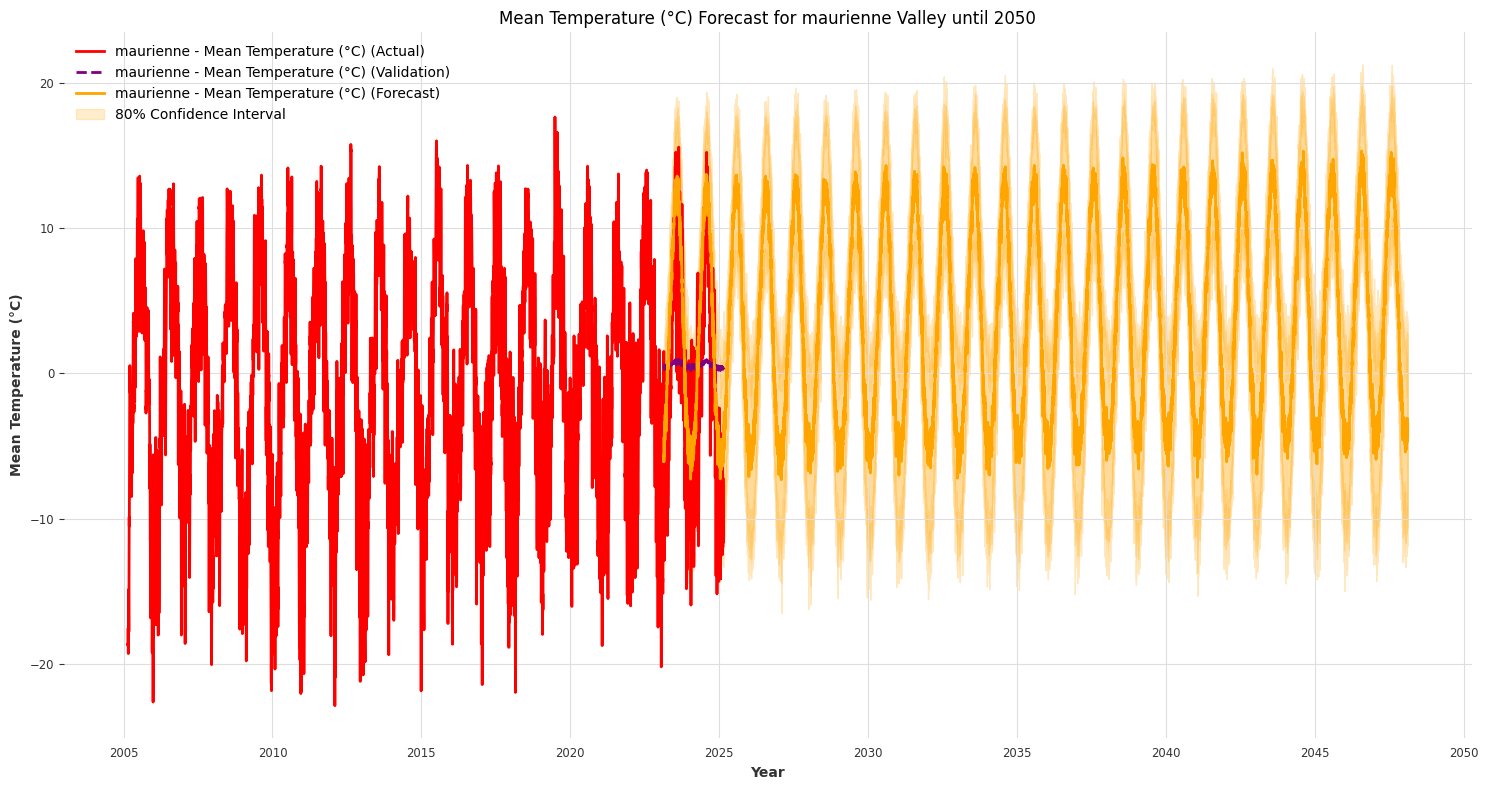

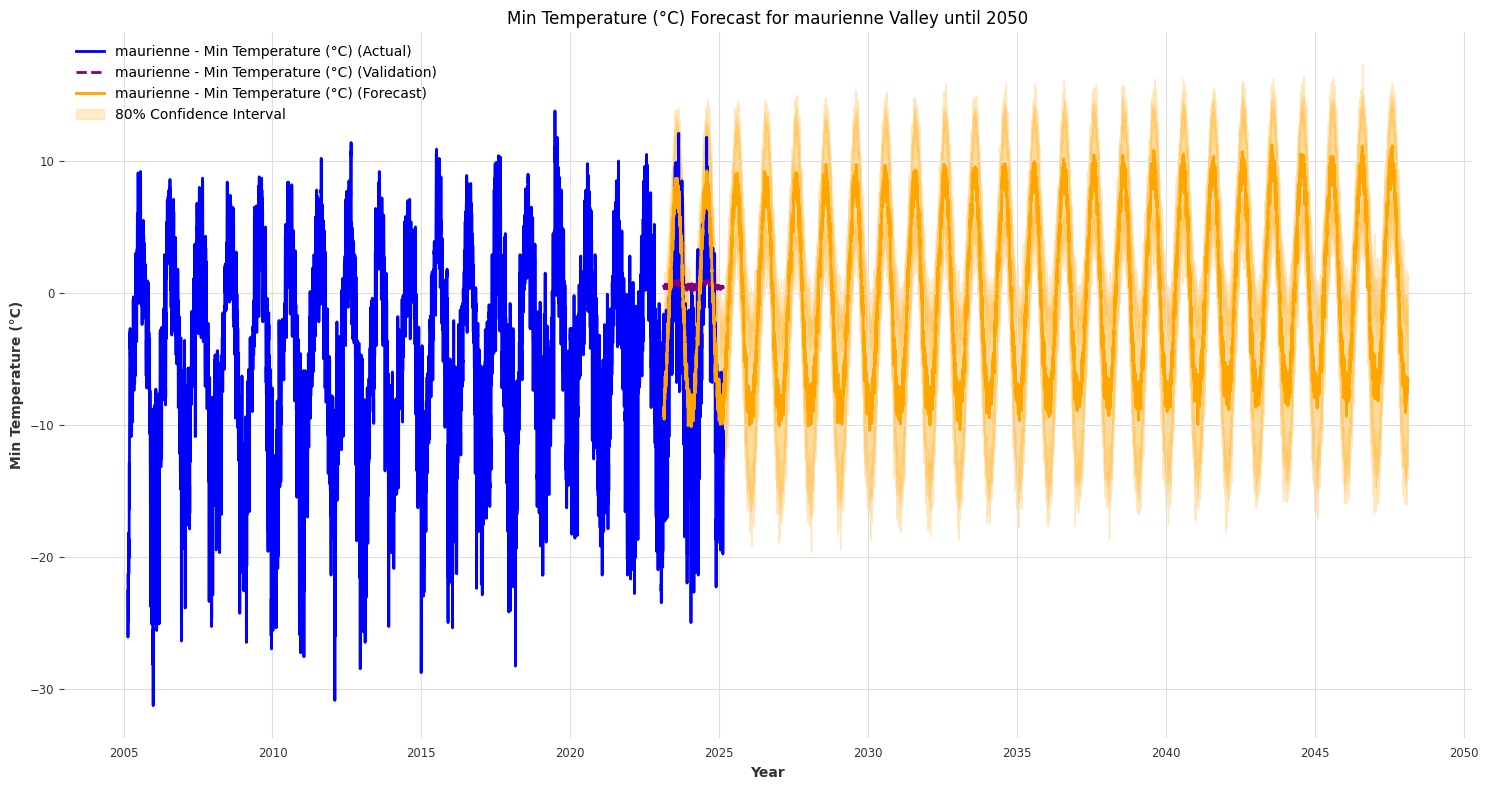

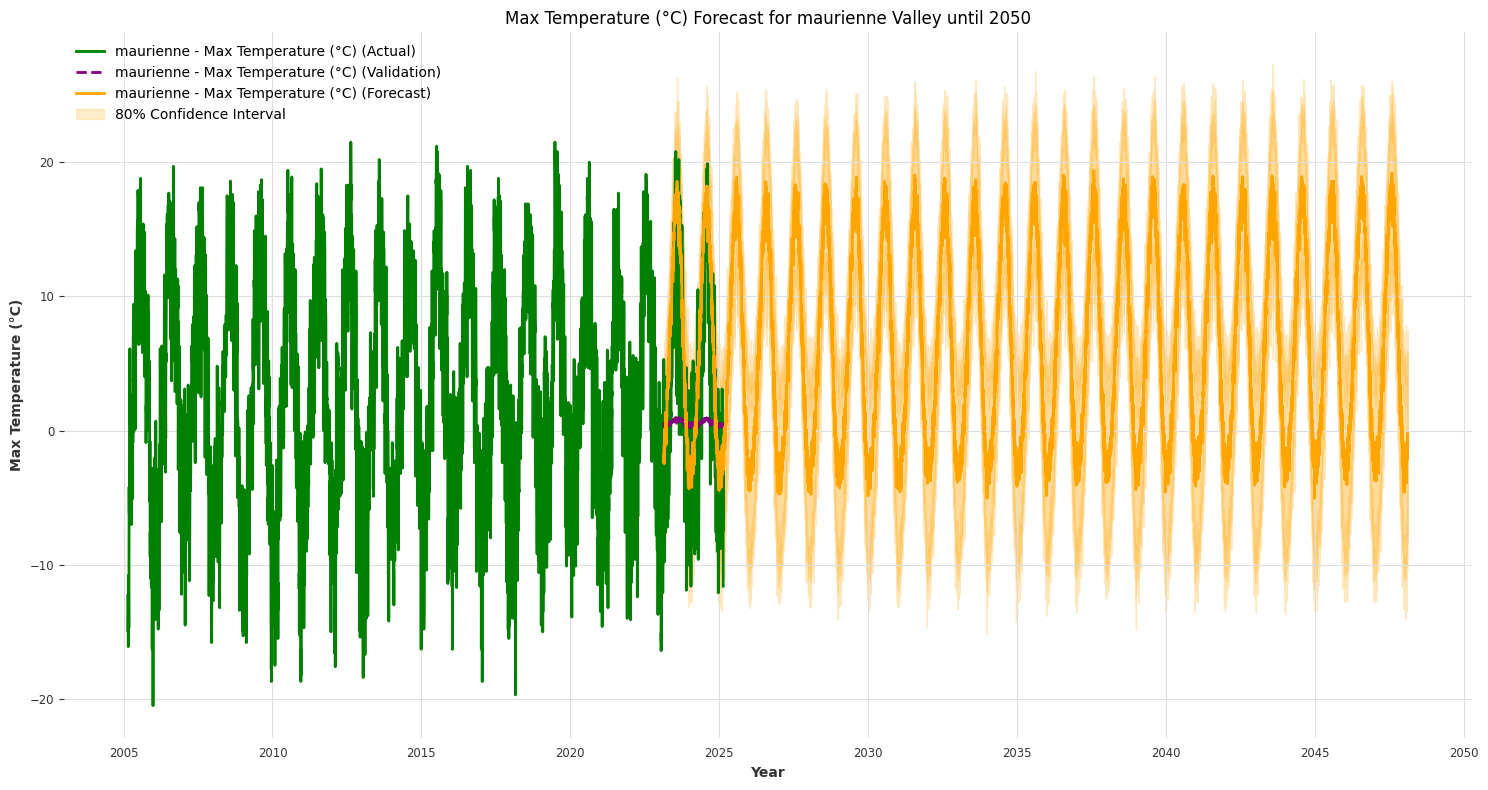

Forecasting complete. Results saved as PNG files.


In [66]:
# Create and run the forecaster
forecaster = WeatherForecaster(CONFIG)
results = forecaster.run_pipeline()
print(f"Forecasting complete. Results saved as PNG files.")


In [65]:
class WeatherForecaster(WeatherForecaster):  # Continuing the class definition
    def _plot_forecasts(self,
                        full_series: Dict[str, TimeSeries],
                        forecasts: Dict[str, TimeSeries],
                        val_series: Optional[Dict[str, TimeSeries]] = None) -> None:
        """
        Plot forecasts with confidence intervals for each feature.

        Args:
            full_series (Dict[str, TimeSeries]): Dictionary of full historical time series.
            forecasts (Dict[str, TimeSeries]): Dictionary of forecast time series.
            val_series (Optional[Dict[str, TimeSeries]]): Dictionary of validation time series.
        """
        feature_colors = {
            "Mean Temperature (°C)": "red",
            "Min Temperature (°C)": "blue",
            "Max Temperature (°C)": "green",
            # Add more features as needed
        }

        for valley_id in full_series.keys():
            # Get feature names for this valley
            feature_names = full_series[valley_id].components

            # Plot each feature separately
            for i, feature in enumerate(feature_names):
                plt.figure(figsize=(15, 8))

                # Plot historical data
                hist_series = full_series[valley_id].univariate_component(i)
                hist_series.plot(label=f"{valley_id} - {feature} (Actual)", color=feature_colors.get(feature, "blue"))

                # Plot validation data if provided
                if val_series and valley_id in val_series:
                    val_data = val_series[valley_id].univariate_component(i)
                    val_data.plot(label=f"{valley_id} - {feature} (Validation)", color="purple", linestyle="--")

                # Plot forecast with confidence intervals
                forecast = forecasts[valley_id].univariate_component(i)
                forecast.plot(label=f"{valley_id} - {feature} (Forecast)", color="orange")

                # Plot confidence intervals if this is a probabilistic forecast
                # Check if the forecast is probabilistic by checking the number of samples
                if forecast.n_samples > 1:
                    p10, p90 = forecast.quantile_timeseries(0.1), forecast.quantile_timeseries(0.9) # Changed to quantile_timeseries for deterministic forecasts
                    plt.fill_between(
                        forecast.time_index,
                        p10.values().flatten(),
                        p90.values().flatten(),
                        alpha=0.2,
                        color="orange",
                        label="80% Confidence Interval"
                    )

                plt.title(f"{feature} Forecast for {valley_id} Valley until {self.config['target_year']}")
                plt.xlabel("Year")
                plt.ylabel(feature)
                plt.legend()
                plt.grid(True)
                plt.tight_layout()

                # In Colab, display the plot
                plt.show()

                # Save the plot to file
                plt.savefig(f"{valley_id}_{feature.replace(' ', '_')}_forecast.png")
                plt.close()

                logging.info(f"Plot saved for {valley_id} - {feature}")

In [ ]:
# Optional: Compare different models
def compare_models(config, target_columns=None):
    """Compare performance of different models on the dataset."""
    if target_columns is None:
        target_columns = config["target_columns"][:1]  # Just use first target for comparison

    model_types = ["NBEATSModel", "BlockRNNModel", "TCNModel", "TFTModel"]
    results = {}

    for model_type in model_types:
        print(f"\nTraining {model_type}...")

        # Update config with current model
        test_config = config.copy()
        test_config["model_type"] = model_type
        test_config["target_columns"] = target_columns
        test_config["n_epochs"] = 20  # Reduced for comparison

        try:
            forecaster = WeatherForecaster(test_config)
            # Load data
            series_dict = forecaster._load_data()
            # Preprocess data
            train_dict, val_dict = forecaster._preprocess_data(series_dict)
            # Train model
            forecaster._train_model(train_dict, val_dict)

            # Calculate validation metrics
            val_metrics = {}
            for valley_id in val_dict.keys():
                val_true = forecaster.scalers[valley_id].inverse_transform(val_dict[valley_id])

                # Generate predictions for validation period
                val_pred = forecaster.model.predict(
                    n=len(val_true),
                    series=train_dict[valley_id],
                    past_covariates=forecaster.covariates[valley_id] if forecaster.covariates else None
                )
                val_pred = forecaster.scalers[valley_id].inverse_transform(val_pred)

                # Calculate metrics
                mae_val = mae(val_true, val_pred)
                mape_val = mape(val_true, val_pred)
                val_metrics[valley_id] = {"MAE": mae_val, "MAPE": mape_val}

            results[model_type] = val_metrics
            print(f"{model_type} validation metrics: {val_metrics}")

        except Exception as e:
            print(f"Error with {model_type}: {str(e)}")
            results[model_type] = {"error": str(e)}

    # Display comparison table
    comparison_df = pd.DataFrame({
        model: {f"{valley_id}_MAE": metrics.get(valley_id, {}).get("MAE", None)
                for valley_id in config["valley_ids"]}
        for model, metrics in results.items()
    })

    return comparison_df

# Uncomment to run model comparison
# model_comparison = compare_models(CONFIG)
# model_comparison


In [ ]:
def multistation_approach_example():
    """
    Example of different approaches to handle multiple weather stations and valleys.
    Showing code structure without actual implementation.
    """
    print("Three main approaches for handling multiple valleys/stations:")

    # Approach 1: Item ID approach (like in the main code)
    print("\n1. Item ID Approach:")
    print("- Each valley/station is treated as a separate time series")
    print("- Advantage: Simple, allows different scaling per station")
    print("- Implementation: Already shown in main code")

    # Approach 2: Multivariate approach
    print("\n2. Multivariate Approach:")
    print("- All features from all stations in one multivariate time series")
    print("- Advantage: Model learns correlations between stations")

    print("""
    # Example implementation (pseudocode):
    def load_multivariate_data():
        # Load data from all stations
        all_stations_df = []
        for station in stations:
            df = pd.read_csv(f"{station}_data.csv")
            # Rename columns to include station
            for col in feature_columns:
                df.rename(columns={col: f"{col}_{station}"}, inplace=True)
            all_stations_df.append(df)

        # Merge on timestamp
        merged_df = pd.merge(all_stations_df, on="timestamp")

        # Convert to Darts TimeSeries
        ts = TimeSeries.from_dataframe(
            merged_df,
            time_col="timestamp",
            value_cols=[f"{col}_{station}" for col in feature_columns for station in stations]
        )
        return ts
    """)

    # Approach 3: One-hot encoding approach
    print("\n3. One-hot Encoding Approach:")
    print("- Add station/valley identifiers as one-hot encoded features")
    print("- Advantage: Allows model to learn location-specific patterns")

    print("""
    # Example implementation (pseudocode):
    def generate_station_covariates(ts, station_id):
        # Create one-hot encoding for stations
        station_ids = ["station1", "station2", "station3", "station4"]
        one_hot = [1 if station_id == sid else 0 for sid in station_ids]

        # Create covariates TimeSeries with same time index
        covariates_data = np.tile(one_hot, (len(ts), 1))
        covariates = TimeSeries.from_values(covariates_data, index=ts.time_index)

        return covariates
    """)

    print("\nRecommendation: Use multivariate approach for stations within the same valley,")
    print("and item_id approach for different valleys.")

# multistation_approach_example()
